# Lower Back Pain Symptoms

Typical sources of low back pain include:

- The large nerve roots in the low back that go to the legs may be irritated
- The smaller nerves that supply the low back may be irritated
- The large paired lower back muscles (erector spinae) may be strained
- The bones, ligaments or joints may be damaged
- An intervertebral disc may be degenerating

An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. A simple lower back muscle strain might be excruciating enough to necessitate an emergency room visit, while a degenerating disc might cause only mild, intermittent discomfort.

**Question :** Identfied the Lower Backpain based on Input data Provided

## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
import os

sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

## Import Dataset

In [2]:
dataset_path = "/Users/nilvarshney/Google Drive/Machine Learning/PythonML/Datasets/"
data_file="spine.csv"

# actual data columns
fields = ['Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11',
         'Col12','Class_att']

# new column name 
new_fields = ['Pelvic Incidence','Pelvic Tilt','Lumbar Lordosis Angle','Sacral Slope','Pelvic Radius',
                  'Degree Spondylolisthesis','Pelvic Slope','Direct Tilt','Thoracic Slope','Servical Tilt','Sacrum Angle',
                  'Scoliosis Slope','Class']

def load_csv_file(dir,file,columns,rename_columns):
    file_complete_path = dataset_path+data_file
    load_data = pd.read_csv(file_complete_path)
    load_data = load_data[fields]
    load_data.columns = rename_columns
    return load_data

spines = load_csv_file(dataset_path,data_file,fields,new_fields)

### Exploratory Data Analysis

In [3]:
print ('No of Observations : {}'.format(spines.shape[0]))
print ('No of Features :{}'.format (spines.shape[1] -1))

No of Observations : 310
No of Features :12


In [4]:
spines.head(5)

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Degree Spondylolisthesis,Pelvic Slope,Direct Tilt,Thoracic Slope,Servical Tilt,Sacrum Angle,Scoliosis Slope,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [5]:
spines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
Pelvic Incidence            310 non-null float64
Pelvic Tilt                 310 non-null float64
Lumbar Lordosis Angle       310 non-null float64
Sacral Slope                310 non-null float64
Pelvic Radius               310 non-null float64
Degree Spondylolisthesis    310 non-null float64
Pelvic Slope                310 non-null float64
Direct Tilt                 310 non-null float64
Thoracic Slope              310 non-null float64
Servical Tilt               310 non-null float64
Sacrum Angle                310 non-null float64
Scoliosis Slope             310 non-null float64
Class                       310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


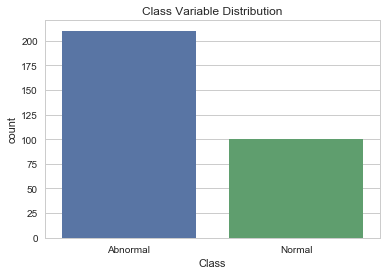

In [6]:
sns.countplot(x = "Class", data = spines)
plt.title('Class Variable Distribution')
plt.show()

In [7]:
spines.describe()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Degree Spondylolisthesis,Pelvic Slope,Direct Tilt,Thoracic Slope,Servical Tilt,Sacrum Angle,Scoliosis Slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


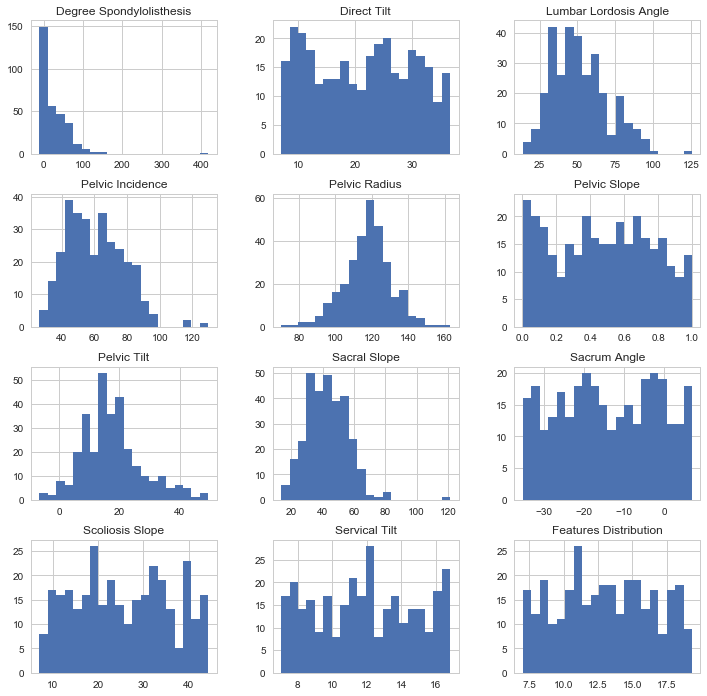

In [8]:
spines.hist(figsize=(12,12),bins = 20)
plt.title("Features Distribution")
plt.show()

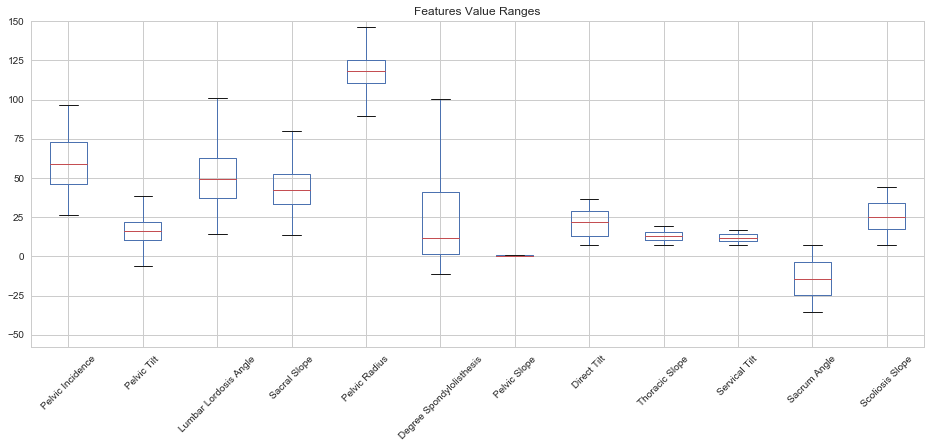

In [9]:
spines.boxplot(figsize=(16,6))
plt.title("Features Value Ranges")
plt.ylim(ymax=150)
plt.xticks(rotation=45,)
plt.show()

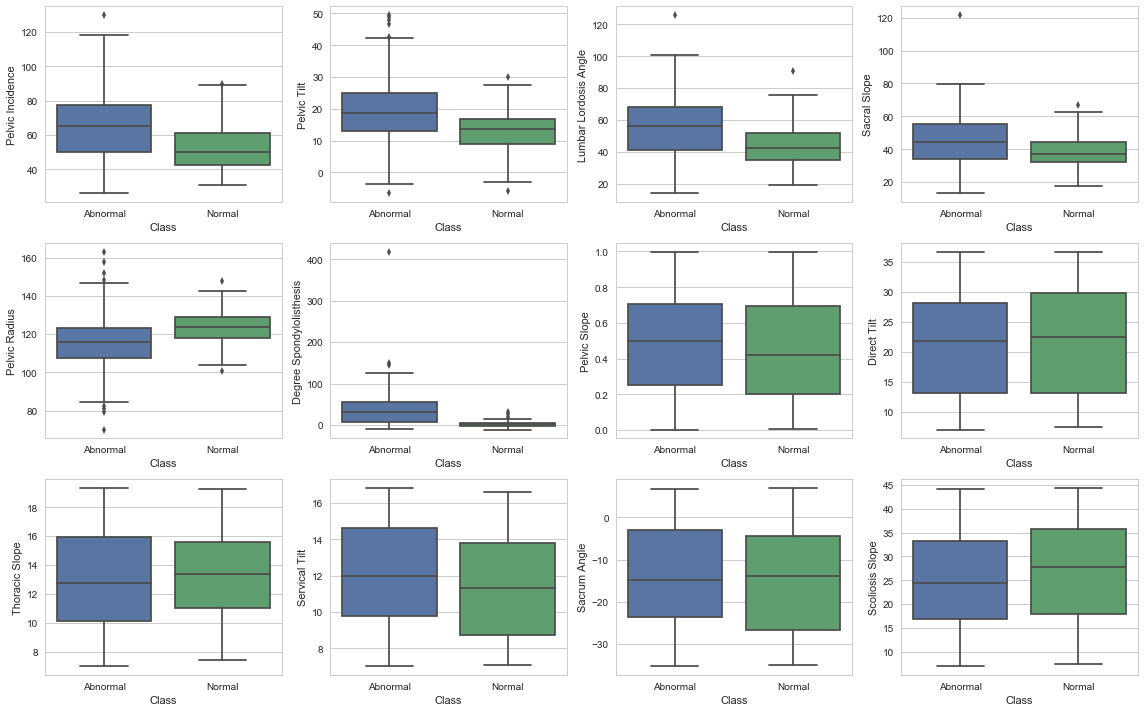

In [10]:
fig,ax = plt.subplots(nrows = 3, ncols=4, figsize=(16,10))
row = 0
col = 0
for i in range(len(spines.columns) -1):
    if col > 3:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = spines['Class'], y = spines[spines.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

### Features Engineering

#### Min_Max Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_minmax = minMaxScaler.fit_transform(spines.iloc[:,0:12].values)

#### Normalizer

In [34]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
X_normalized = normalizer.fit_transform(spines.iloc[:,0:12].values)

#### Label Encoder

In [37]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y_labels = labelEncoder.fit_transform(spines['Class'].values)

### Split dataset

In [90]:
# Split dataset
X = spines.iloc[:,0:12].values
# raw form
(X_train, X_test, y_train,y_test) = train_test_split(X,y_labels,test_size=0.40,random_state = 1)

# Normalized
(X_train_norm, X_test_norm, y_train_norm,y_test_norm) = train_test_split(X_normalized,y_labels,test_size=0.40,random_state = 1)

# min_max transformation
(X_train_min_max, X_test_min_max, y_train_min_max,y_test_min_max) = train_test_split(X_minmax,y_labels,test_size=0.40,random_state = 1)

### Benchmark Model ( K-nearest Neighbour)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

def knn(train_features,train_predictor, test_features,test_predictor, k_value):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import Imputer
    from sklearn.pipeline import Pipeline
    
    feature_pipeline = Pipeline([
    ('imputer',Imputer(strategy='mean'))])
    train_features_prepared = feature_pipeline.fit_transform(train_features)
    test_features_prepared = feature_pipeline.fit_transform(test_features)
    train_accuracy = []
    test_accuracy = []
    for k in k_value:
        clf = KNeighborsClassifier(n_neighbors=k).fit(train_features_prepared,train_predictor)
        train_accuracy.append(clf.score(train_features_prepared,train_predictor))
        test_accuracy.append(clf.score(test_features_prepared,test_predictor))

    plt.plot(k_value,train_accuracy, label = 'Train', color = 'blue')
    plt.plot(k_value,test_accuracy, label = 'Test', color = 'red')
    plt.title('Train-Test Accuracy Plot')
    plt.xlabel('Nearest Neighbors counts')
    plt.ylabel('Model Accuracy')
    plt.legend()
    #plt.show()


##### KNN - Without any transformation

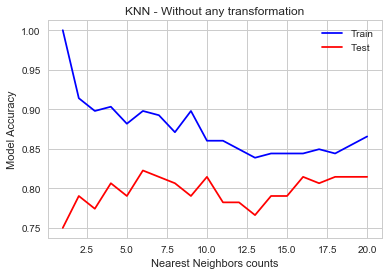

In [92]:
k_values = range(1,21)
knn(X_train, y_train,X_test,y_test,k_values)
plt.title("KNN - Without any transformation")
plt.show()

##### KNN - With Min Max transformation

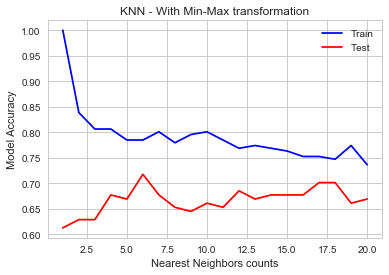

In [93]:
k_values = range(1,21)
knn(X_train_min_max, y_train_min_max,X_test_min_max,y_test_min_max,k_values)
plt.title("KNN - With Min-Max transformation")
plt.show()

##### KNN - With Normalizer transformation

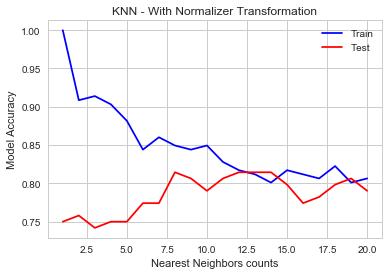

In [94]:
k_values = range(1,21)
knn(X_train_norm, y_train_norm,X_test_norm,y_test_norm,k_values)
plt.title("KNN - With Normalizer Transformation")
plt.show()

K value 6 with Min Max transformation is shows better results. Lets consider this for next KNN analysis.

#### Cross Validation

Lets check the outcome from previous analysis using cross validation on training data

In [95]:
# cross validation
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=6).fit(X_train_min_max, y_train_min_max)
score_knn = cross_val_score(clf,X_train_min_max, y_train_min_max,cv = 10)

In [96]:
print('K-NN accuracy score => ')
print('\tMax:\t {:.4}\t'.format(score_knn.max()))
print('\tMin:\t {:.4}\t'.format(score_knn.min()))
print('\tMean:\t {:.4}\t'.format(score_knn.mean()))
print('\tStd:\t {:.4}\t'.format(score_knn.std()))

K-NN accuracy score => 
	Max:	 0.8889	
	Min:	 0.5	
	Mean:	 0.6917	
	Std:	 0.1076	


#### KNN - Use Parameter Grids

In [97]:
# Param Grid
def knn_param_grid(features, outcome):
    from sklearn.model_selection import GridSearchCV
    param_grid = [
        {'n_neighbors' :range(1,21),
        'leaf_size' :[20,25,30],
        'algorithm':['ball_tree', 'kd_tree', 'brute','auto']}
    ]
    clf = KNeighborsClassifier()
    grid_search = GridSearchCV(clf,param_grid,cv = 5)
    grid_search.fit (features, outcome)
    print('Best Parameters :',grid_search.best_params_)
    print('Best Score :',grid_search.best_score_)

#### KNN - without data transforamtion

In [98]:
knn_param_grid(X_train, y_train)

Best Parameters : {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5}
Best Score : 0.854838709677


#### KNN - with min-max data transforamtion

In [99]:
knn_param_grid(X_train_min_max, y_train_min_max)

Best Parameters : {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 8}
Best Score : 0.758064516129


#### KNN - with Normalizer data transforamtion

In [100]:
knn_param_grid(X_train_norm, y_train_norm)

Best Parameters : {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 1}
Best Score : 0.849462365591


## Features Engineering

In [18]:
from sklearn import preprocessing 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

spines['Class_int'] = preprocessing.LabelEncoder().fit_transform(spines['Class'])
features = spines.iloc[:,0:12].values
predicator = spines['Class_int'].values

X_train ,X_test, y_train , y_test = model_selection.train_test_split(features,predicator,random_state  = 42,test_size = .20)

# Param Grid
param_grid_logit = [
    {'C': [0.001,0.01,0.1,1,10,100]}
]

log_reg = LogisticRegression()
grid_search_logit = GridSearchCV(log_reg,param_grid_logit,cv =5)
logit = grid_search_logit.fit(X_train,y_train)
logit.score


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

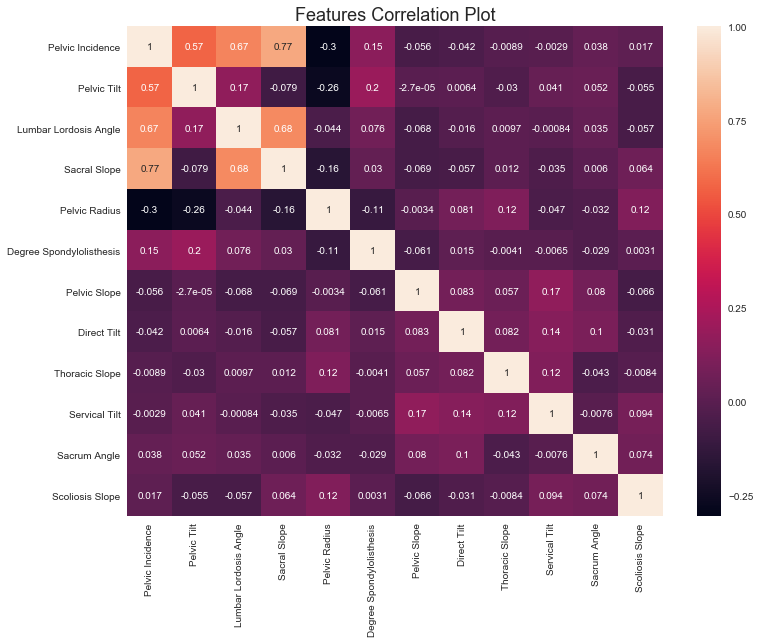

In [19]:
spine_features = spines_no_outliers.drop('Class',axis = 1)

fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(spine_features.corr(),annot=True)
plt.title('Features Correlation Plot',size = 18)
plt.show()

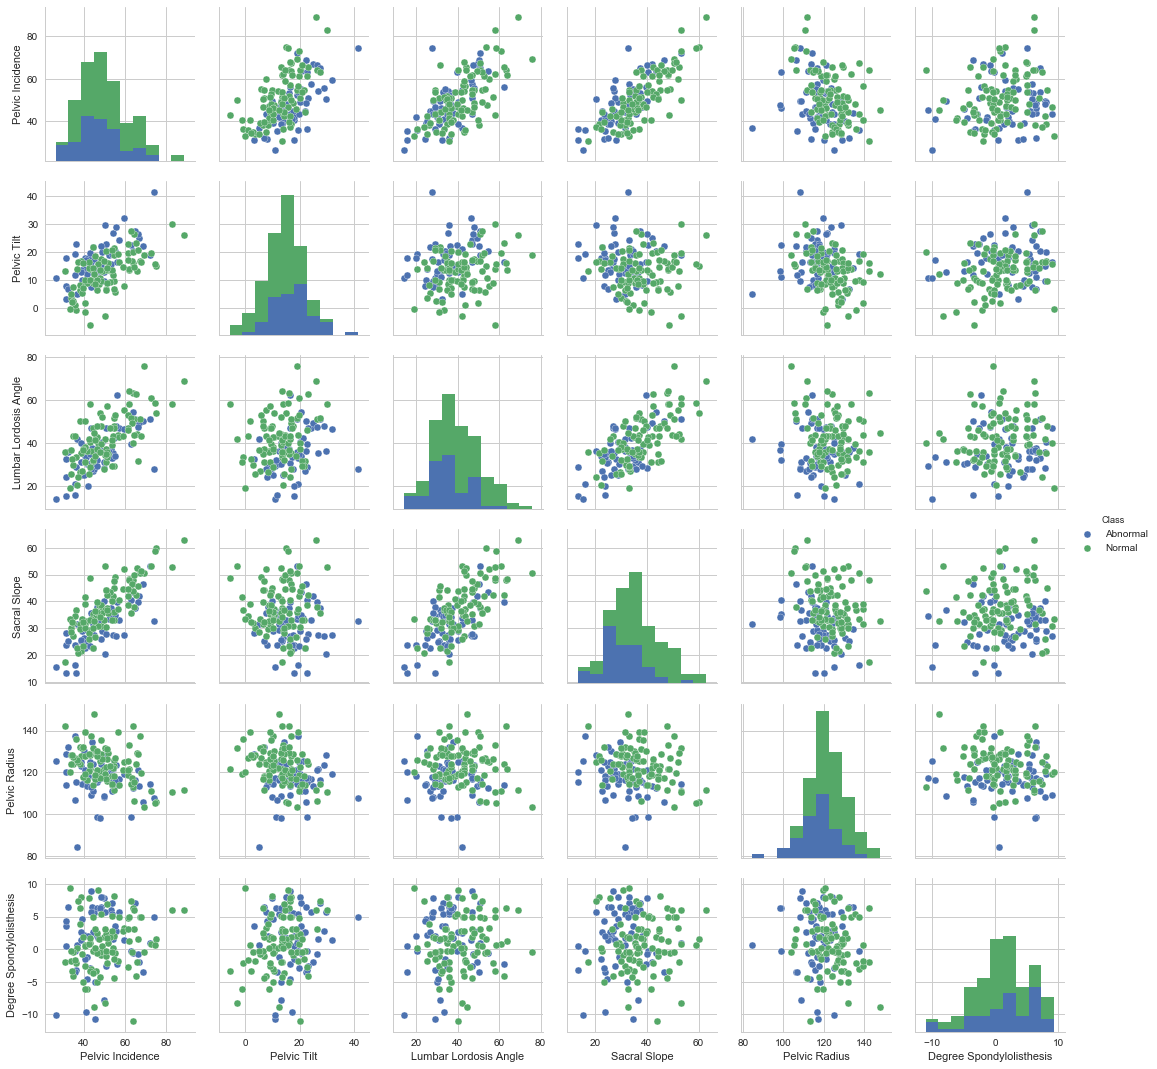

In [20]:
high_variance = ['Pelvic Incidence',
                 'Pelvic Tilt',
                 'Lumbar Lordosis Angle',
                 'Sacral Slope',
                 'Pelvic Radius',
                  'Degree Spondylolisthesis',
                 'Class']
data = spines_no_outliers[high_variance]
sns.pairplot(data,hue = 'Class' )
plt.show()

In [21]:
X = spines_no_outliers.iloc[:,0:12].values
y = spines_no_outliers['Class'].values
(X_train, X_test, y_train,y_test) = train_test_split(X,y,test_size=0.25,random_state = 1)

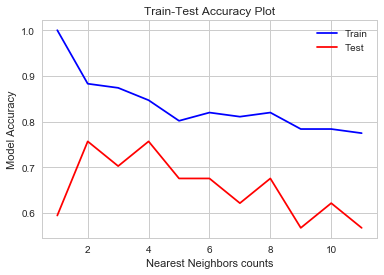

In [22]:
neighbors = range(1,12)
train_accuracy = []
test_accuracy = []

for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    train_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors,train_accuracy, label = 'Train', color = 'blue')
plt.plot(neighbors,test_accuracy, label = 'Test', color = 'red')
plt.title('Train-Test Accuracy Plot')
plt.xlabel('Nearest Neighbors counts')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

#### Scale the data for KNN

In [23]:
normalizer = Normalizer().fit(X_train)
X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)

#### KNN Classification

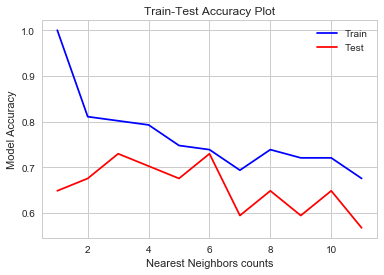

In [24]:
neighbors = range(1,12)
train_accuracy = []
test_accuracy = []

for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train_normalized,y_train)
    train_accuracy.append(clf.score(X_train_normalized,y_train))
    test_accuracy.append(clf.score(X_test_normalized,y_test))

plt.plot(neighbors,train_accuracy, label = 'Train', color = 'blue')
plt.plot(neighbors,test_accuracy, label = 'Test', color = 'red')
plt.title('Train-Test Accuracy Plot')
plt.xlabel('Nearest Neighbors counts')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

#### Losistic Regression

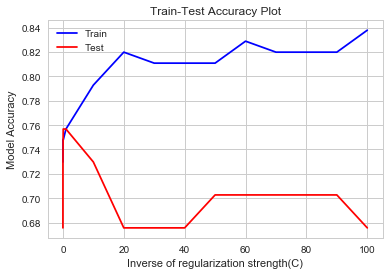

In [25]:
from sklearn.linear_model import LogisticRegression

train_accuracy = []
test_accuracy = []
c = [0.001, 0.01,0.1,1,10,20,30,40,50,60,70,80,90,100]
for c_value in c:
    logi = LogisticRegression(C=c_value,random_state=1).fit(X_train,y_train)
    train_accuracy.append(logi.score(X_train,y_train))
    test_accuracy.append(logi.score(X_test,y_test))

plt.plot(c,train_accuracy, label = 'Train', color = 'blue')
plt.plot(c,test_accuracy, label = 'Test', color = 'red')
plt.title('Train-Test Accuracy Plot')
plt.xlabel('Inverse of regularization strength(C)')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()
    

#### KNN Classification with PCA - 4 components

In [26]:
# PCA Prinicapal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 4, random_state=1).fit(X_train_normalized)
X_train_pca = pca.transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

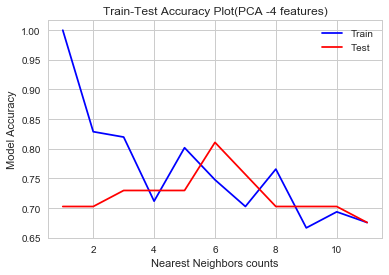

In [27]:
neighbors = range(1,12)
train_accuracy = []
test_accuracy = []

for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train_pca,y_train)
    train_accuracy.append(clf.score(X_train_pca,y_train))
    test_accuracy.append(clf.score(X_test_pca,y_test))

plt.plot(neighbors,train_accuracy, label = 'Train', color = 'blue')
plt.plot(neighbors,test_accuracy, label = 'Test', color = 'red')
plt.title('Train-Test Accuracy Plot(PCA -4 features)')
plt.xlabel('Nearest Neighbors counts')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

In [28]:
spines.columns.values

array(['Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Lordosis Angle',
       'Sacral Slope', 'Pelvic Radius', 'Degree Spondylolisthesis',
       'Pelvic Slope', 'Direct Tilt', 'Thoracic Slope', 'Servical Tilt',
       'Sacrum Angle', 'Scoliosis Slope', 'Class', 'Class_int'], dtype=object)